<a href="https://colab.research.google.com/github/JoshuaBarsky/Math-152/blob/main/My_Exploration1_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration 1 Guide

Choose one (yes, only one) of the following topics for your exploration.  These are small group projects -- there should be no more than 5 people in each group.  Every person in the group will receive the same grade, and please try to contribute to your group!

You may use any programming techniques we have discussed in Notebooks 1, 2, and 3.  Please do not use other "fancy" techniques, creating custom classes, using dictionary comprehension, importing highly specialized packages, etc.  Keep it simple please!

Your notebook should be a report containing both text cells and well-
documented code cells. Your text cells should include a heading (title) and
short (one paragraph) introduction, and should lead the reader through your
explorations. You should write text summaries of what you found, in clear
and precise English. Before long code blocks, you should introduce the code,
and tell the reader what it does, and why you are doing it.  At the end, you should write a little conclusion, or at least get to a nice stopping point.

There are a lot of papers written about these topics. You shouldn’t
need to look at these papers (maybe one or two, if you want), but if you
do use results you must cite them. For citation, please provide complete
bibliographic information in your notebook, and web links to papers online.
Limit your references to published papers and preprints, by looking at (1)
papers published in scholarly math journals, (2) papers published by scien-
tific journals, e.g., Annals of Mathematics or a popular journal like Quanta, and (3) preprints from arxiv.org. If you want to look at Wikipedia, it’s fine, but please use it primarily for the references (typically given at the bottom of the Wikipedia page.

You may look things up, but do not just copy and paste code from elsewhere, especially without citation.  If you do not cite your sources, that is a violation of academic integrity.  If you get completely stuck, and look up someone else's code (or use a computer code-generating tool), please describe what happened -- where you got stuck and where the code comes from (URL, print source, etc.)  Just **be honest**!

Your submission should be a link to a ipynb notebook stored on a GitHub directory, just like your NB1 assignment.

# Topic 1:  Gauss's Circle Conjecture

Consider a circle of radius $R$ centered at the origin $(0,0)$.  So the area of the circle is $A(R) = \pi R^2$.  A **lattice point** is a point $(a,b)$ with integer coordinates, i.e., $a$ and $b$ are integers.  Let $L(R)$ be the number of lattice points contained inside the circle of radius $R$.  In other words, $L(R)$ is the number of points $(a,b)$ with integers $a,b$ satisfying $a^2 + b^2 \leq R^2$.  (Note I've used a less-than-or-equal here).

One might suspect, as Gauss did, that $A(R)$ is pretty close to $L(R)$.  Explore this using Python.  In particular, explore the following questions:

1.  (Must do:) Write a function to compute $L(R)$.  Try to make it compute $L(R)$ quickly, if you can, even if $R$ is big (like 1000 perhaps, or maybe much bigger).  But be careful... don't ask your computer to try $L(1000000)$ until you try some smaller inputs and see how long it will take.  

2.  Analyze the "error" $E(R) = A(R) - L(R)$.  How does this grow, relative to the size of $R$?  Does it grow as fast as $R^2$?  As fast as $R$?  As fast as $\sqrt{R}$?  As fast as $R^{2/3}$?  How can you use Python, and your math skills, to carry out this analysis?  Conduct this analysis with a combination of Python code and text blocks to explain what you're doing.

3.  There are many variants on this topic.  For example, spheres in 3-d instead of circles.  Or ellipses instead of circles.  Or different kinds of lattices besides the usual "square grid" of integer-coordinates.  Try one variant, and describe your findings.




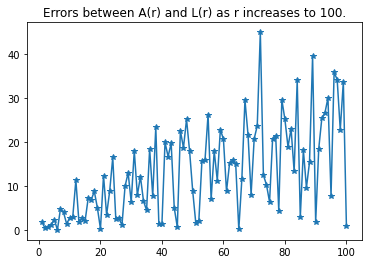

In [61]:
from numpy.lib.shape_base import kron
from numpy.core.numeric import indices
import math
import numpy as np
import matplotlib.pyplot as plt

#1
def A(r):
  return r**2*math.pi

def L(r):
  i = 1
  ans = 0
  while(i <= r):
    ans += math.floor(math.sqrt(r**2 - i**2)) + 1
    i += 1
  return 1 + ans * 4

#2
def E(r):
  return A(r) - L(r)

max_radius = 100
k = [0]*(max_radius)
areas = [0]*(max_radius)
lattices = [0]*(max_radius)
errors = [0]*(max_radius)

for i in range(max_radius):
  k[i] = i+1
  areas[i] = A(i+1)
  lattices[i] = L(i+1)
  errors[i] = abs(E(i+1))

plt.plot(k, errors, '-*')
plt.title("Errors between A(r) and L(r) as r increases to {}.".format(max_radius))
plt.show()



# Topic 2:  Reciprocity laws in the spirit of Euler

Let $p$ be a prime number, with $p \neq 2$.  In a letter to Mersenne written on Christmas day, Fermat mentioned that $p$ can be expressed as a sum of two squares if and only if $p \div 4$ leaves a remainder of $1$, i.e., if $p = 4n+1$ for some integer $n$.  For example, $73$ is such a prime number ($73 = 4(18) + 1$) and $73 = 8^2 + 3^2$.  On the other hand, $7$ is not such a prime number.  Note that $7 = 4(1) + 3$, and $7$ cannot be written as $x^2 + y^2$ for integers $x$ and $y$.

From a modern perspective, Fermat's "Christmas Theorem" is the first instance of a reciprocity law.  Euler found many more.  For example, a prime $p$ can be expressed as $x^2 + 3y^2$ if and only $p \div 12$ equals 1 or 7 (or if $p=3$).  For example $7 = 2^2 + 3(1^2)$ and $13 = 1^2 + 3(2^2)$.  

In this project, see if you can discover more of these "reciprocity laws".  A reciprocity law here is a theorem of the form:  A prime number $p$ can be expressed as $x^2 + N y^2$ if and only if $p \div M$ belongs to a certain finite set.  E.g., one can take $N = 3$ and $M = 12$, and the finite set would be $1,3,7$.  Typically one looks at $M = 4N$, in fact.

For this project, you can use a "primelist" function to make a list of primes.  There is one in NB 3, and here it is.

In [ ]:
from math import sqrt

def isprime_list(n):
    ''' 
    Return a list of length n+1
    with Trues at prime indices and Falses at composite indices.
    '''
    flags = [True] * (n+1)  # A list [True, True, True,...] to start.
    flags[0] = False  # Zero is not prime.  So its flag is set to False.
    flags[1] = False  # One is not prime.  So its flag is set to False.
    flags[4::2] = [False] * ((n-2)//2)
    p = 3
    while p <= sqrt(n):  # We only need to sieve by p is p <= sqrt(n).
        if flags[p]:  # We sieve the multiples of p if flags[p]=True.
            flags[p*p::2*p] = [False] * ((n-p*p)//(2*p)+1) # Sieves out multiples of p, starting at p*p.
        p = p + 2 # Try the next value of p.
        
    return flags

def where(L):
    '''
    Take a list of booleans as input and
    outputs the list of indices where True occurs.
    '''
    return [n for n in range(len(L)) if L[n]]

primes = where(isprime_list(1000000)) # The primes up to 1 million, in a list.

In [ ]:
primes[:5] # The first 5 prime numbers.

[2, 3, 5, 7, 11]

In [ ]:
for p in primes[:5]:
  print(p%4) # Print the remainders of p/4 for the first 5 primes.

2
3
1
3
3


1.  (Must do) Write a function which takes as input a prime number p and positive integer N, and outputs True or False, depending on whether p can or cannot be expressed in the form $x^2 + N y^2$ for integers $x,y$.

2.  Look at primes $p$ of the form $x^2 + N y^2$, and the remainders `p % (4*N)` for various positive integers $N$.  Do all possible remainders occur?  Look for and describe the patterns you find.

3.  Try to find new reciprocity laws, focusing on cases where it seems like there is an "if and only if" statement -- a prime $p$ can be written as $x^2 + N y^2$ if and only if $p / 4N$ leaves a certain kind of remainder.  

4.  Consider variants, like primes of the form $ax^2 + b y^2$ for small positive $a,b$.  Can you find any reciprocity laws for these?  Try using $4ab$ instead of the $4N$ from before.  What about sums of cubes and other variants?  Describe your findings!

# Topic 3:  A Polygon Toolkit

In this topic, you will create a toolkit of functions to work with polygons.  To describe a polygon, you can use two lists of numbers (ints, floats, whatever) of the same length.  One list will be the list of x-coordinates of vertices, and the other will be the list of y-coordinates of vertices.  For example, if `xlist = [1,2,3]` and `ylist = [4,5,6]`, then these describe the triangle with vertices at $(1,4)$ and $(2,5)$ and $(3,6)$.

1.  (Must do)  Write a function with inputs x1,y1,x2,y2 and u1,v1,u2,v2, which determines whether the line segment joining $(x1,y1)$ to $(x2,y2)$ intersects the line segment joining $(u1,v1)$ to $(u2,v2)$.  This is a bit tricky... try to make sure your function runs correctly and efficiently by demonstrating it for some test cases.  If your code is hard to understand, include an explanation of why it works!

2.  A polygon is called "simple" if the edges do not intersect, except where they should.  In other words, each edge should intersect the next and previous edges at the endpoints, e.g., the edge from (1,4) to (2,5) intersects the next edge from (2,5) to (3,6)... but only at the vertex (2,5).  Write a function which takes in an xlist and ylist, and determines whether the resulting polygon is simple.  Note that the xlist and ylist are mean to give the x and y coordinates of the vertices, going around the polygon in order.  The last (x,y) pair should be joined to the first (x,y) pair to make the polygon "close up".

3.  Write a function which computes the *area* of a simple polygon.  There are various approaches, and you might look up "Green's Theorem" for areas of polygons to find a quick one!  Please describe the formula you use.

4.  A challenge:  Suppose that the vertices of your polygon are lattice points, i.e., they have integer coordinates.  [Pick's Theorem](https://en.wikipedia.org/wiki/Pick%27s_theorem) relates the area of a polygon to the number of interior lattice points and edge lattice points.  You can use the Euclidean algorithm to count edge lattice points, and previous parts to figure out areas.  Use these together to write a function which finds the number of *interior* lattice points inside any simple polygon.

5.  A further challenge:  Given a point $(x,y)$, and a simple polygon, can you write a program to quickly determine whether $(x,y)$ is *inside* the polgyon or *outside* the polyon or *on an edge* of the polygon?



# Topic 4:  The Collatz Conjecture

Begin with an integer $n$.  If it is even, divide it by $2$.  If it is odd, triple it and add one.  Then repeat.  

For example, if you begin with the number $3$, you get the sequence:
$$3, 10, 5, 16, 8, 4, 2, 1, 4, 2, 1, \ldots.$$

It is a famous open conjecture (the Collatz conjecture, or $3n+1$ problem) that... if you begin with *any* positive integer $n$, then the resulting sequence ends up in the repeating $4,2,1,4,2,1,\ldots$ cycle.  

1.  (Must do) Write a function which takes an integer $n$ as input, and outputs or otherwise prints the "Collatz" sequence until it hits the number $1$.

2.  (Must do)  Write a function which takes an integer $n$ as input, and counts the number of steps in the Collatz sequence until a *smaller* integer is found.  For example, starting from the number $3$, the sequence $3,10,5,16,8,4,2$ reaches a number smaller than $3$ in 6 steps.  We say that the "dropping time" of $3$ is $6$.  On the other hand, the dropping time of any even number is $1$, e.g., $10$ drops immediately to $5$.

3.  Verify the Collatz conjecture for numbers up to $100$, in a quick way.

4.  Study the dropping time.  Do certain numbers have particular dropping times?  What patterns can you find?

5.  Study at least one variant of the Collatz conjecture.  What happens if you start with a *negative* integer $n$, for example?  Make sure your computer doesn't get caught in an infinite loop though!  What about variants... can you find other similar "rules" that yield interesting sequences, get caught in cycles, etc.?  Describe what you find.
